In [1]:
import numpy as np
import pandas as pd 
from matplotlib import pyplot as plt
from matplotlib import style
style.use('ggplot')

In [2]:
df = pd.read_csv('SF_data/Spending_and_Revenue.csv')
df.head()

C:\Users\craig\Desktop\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3051: DtypeWarning: Columns (6,10,12,13,14,16,18) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Fiscal Year,Revenue or Spending,Related Govt Units,Organization Group Code,Organization Group,Department Code,Department,Program Code,Program,Character Code,...,Object,Sub-object Code,Sub-object,Fund Type Code,Fund Type,Fund Code,Fund,Fund Category Code,Fund Category,Amount
0,2019,Spending,NO,2,"Public Works, Transportation & Commerce",MTA,NaN,OPR,Operating,MAND_FRING_BEN,...,NaN,516010,NaN,ENT_FUND,NaN,ENT_FUND~MTA_TRANSIT,NaN,1.0,Operating,5623772.25
1,2018,Spending,NO,5,Culture & Recreation,REC,NaN,OPR,Operating,NON_PERS_SVCS,...,NaN,528110,NaN,GEN_FUND,NaN,GEN_FUND~10080,NaN,5.0,Work Orders/Overhead,16356.60
2,2019,Spending,NO,4,Community Health,DPH,NaN,OPR,Operating,NON_PERS_SVCS,...,NaN,535950,NaN,GEN_FUND,NaN,GEN_FUND~10000,NaN,1.0,Operating,59131.78
3,2019,Spending,NO,2,"Public Works, Transportation & Commerce",PUC,NaN,OPR,Operating,NON_PERS_SVCS,...,NaN,527510,NaN,ENT_FUND,NaN,ENT_FUND~HH_OP,NaN,2.0,Annual Projects - Authority Control,1835903.46
4,2019,Spending,NO,2,"Public Works, Transportation & Commerce",MTA,NaN,OPR,Operating,SALARIES,...,NaN,511010,NaN,ENT_FUND,NaN,ENT_FUND~MTA_TRANSIT,NaN,1.0,Operating,56971402.95


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600114 entries, 0 to 600113
Data columns (total 22 columns):
Fiscal Year                600114 non-null int64
Revenue or Spending        600114 non-null object
Related Govt Units         600114 non-null object
Organization Group Code    600114 non-null int64
Organization Group         600114 non-null object
Department Code            600114 non-null object
Department                 522551 non-null object
Program Code               599035 non-null object
Program                    599035 non-null object
Character Code             600114 non-null object
Character                  522306 non-null object
Object Code                599868 non-null object
Object                     522306 non-null object
Sub-object Code            600114 non-null object
Sub-object                 522306 non-null object
Fund Type Code             600114 non-null object
Fund Type                  522552 non-null object
Fund Code                  600114 non-nul

In [4]:
df.shape

(600114, 22)

In [5]:
df.columns

Index(['Fiscal Year', 'Revenue or Spending', 'Related Govt Units',
       'Organization Group Code', 'Organization Group', 'Department Code',
       'Department', 'Program Code', 'Program', 'Character Code', 'Character',
       'Object Code', 'Object', 'Sub-object Code', 'Sub-object',
       'Fund Type Code', 'Fund Type', 'Fund Code', 'Fund',
       'Fund Category Code', 'Fund Category', 'Amount'],
      dtype='object')

In [6]:
df.isnull().sum()

Fiscal Year                    0
Revenue or Spending            0
Related Govt Units             0
Organization Group Code        0
Organization Group             0
Department Code                0
Department                 77563
Program Code                1079
Program                     1079
Character Code                 0
Character                  77808
Object Code                  246
Object                     77808
Sub-object Code                0
Sub-object                 77808
Fund Type Code                 0
Fund Type                  77562
Fund Code                      0
Fund                       77562
Fund Category Code          3262
Fund Category               3262
Amount                         0
dtype: int64

In [7]:
df.describe()

,Fiscal Year,Organization Group Code,Fund Category Code,Amount
count,600114.000000,600114.000000,596852.000000,6.001140e+05
mean,2009.799228,3.322340,2.149896,7.505346e+05
std,6.224798,1.783523,1.433193,1.803011e+07
min,1999.000000,1.000000,0.000000,-4.477861e+09
25%,2005.000000,2.000000,1.000000,8.819600e+02
50%,2010.000000,3.000000,1.000000,9.114520e+03
75%,2015.000000,5.000000,3.000000,8.304000e+04
max,2020.000000,7.000000,7.000000,2.673070e+09


In [8]:
df['Revenue or Spending'].value_counts()

Spending    512140
Revenue      87974
Name: Revenue or Spending, dtype: int64

In [9]:
df['Organization Group'].value_counts()

Public Works, Transportation & Commerce     227147
General Administration & Finance            114510
Public Protection                            71968
Community Health                             65816
Culture & Recreation                         65213
Human Welfare & Neighborhood Development     49272
General City Responsibilities                 6188
Name: Organization Group, dtype: int64

In [10]:
df['Organization Group Code'].value_counts()

2    227147
6    114510
1     71968
4     65816
5     65213
3     49272
7      6188
Name: Organization Group Code, dtype: int64

In [11]:
df['Related Govt Units'].value_counts()

No     510621
NO      75146
Yes     11931
YES      2416
Name: Related Govt Units, dtype: int64

In [12]:
df['Fund Category'].value_counts()

Operating                                  308762
Continuing Projects                        115086
Work Orders/Overhead                        60009
Grants                                      42830
Annual Projects                             27204
Continuing Projects - Authority Control     21470
Unspecified                                  9734
Annual Projects - Authority Control          5631
Grants Projects                              4526
Continuing Projects - Project Control        1599
Continuing Projects - Account Control           1
Name: Fund Category, dtype: int64

In [13]:
df['Department Code'].value_counts()

DPW    71351
DPH    65816
MTA    44667
ADM    31562
REC    30727
       ...  
CTA      224
BOA      148
CLP       65
TJP       37
RDA        1
Name: Department Code, Length: 66, dtype: int64

In [14]:
df['Program'].value_counts()

Operating                                   46898
Administration                              19302
Capital                                     15596
City Capital Projects                       14677
No Program Defined                           9602
                                            ...  
SFGH - Early Intervention - Poison Cntrl        1
Human Welfare & Neighborhood Development        1
Concourse Authority                             1
Management Control                              1
Chinese Historical Society                      1
Name: Program, Length: 562, dtype: int64

In [15]:
df_1 = df.copy() # first version 

In [16]:
df.columns

Index(['Fiscal Year', 'Revenue or Spending', 'Related Govt Units',
       'Organization Group Code', 'Organization Group', 'Department Code',
       'Department', 'Program Code', 'Program', 'Character Code', 'Character',
       'Object Code', 'Object', 'Sub-object Code', 'Sub-object',
       'Fund Type Code', 'Fund Type', 'Fund Code', 'Fund',
       'Fund Category Code', 'Fund Category', 'Amount'],
      dtype='object')

In [17]:
df_1.drop(['Organization Group Code', 'Program Code', 'Sub-object Code', 'Fund Type Code', 
           'Fund Type', 'Fund Code', 'Fund Category Code'], axis=1, inplace=True)

In [18]:
df_1

,Fiscal Year,Revenue or Spending,Related Govt Units,Organization Group,Department Code,Department,Program,Character Code,Character,Object Code,Object,Sub-object,Fund,Fund Category,Amount
0,2019,Spending,NO,"Public Works, Transportation & Commerce",MTA,NaN,Operating,MAND_FRING_BEN,NaN,DENTAL_COVER,NaN,NaN,NaN,Operating,5623772.25
1,2018,Spending,NO,Culture & Recreation,REC,NaN,Operating,NON_PERS_SVCS,NaN,MNTSVCS_BLDG_STRUC,NaN,NaN,NaN,Work Orders/Overhead,16356.60
2,2019,Spending,NO,Community Health,DPH,NaN,Operating,NON_PERS_SVCS,NaN,OTH_CURR_EXP,NaN,NaN,NaN,Operating,59131.78
3,2019,Spending,NO,"Public Works, Transportation & Commerce",PUC,NaN,Operating,NON_PERS_SVCS,NaN,PROF_SPEC_SVC,NaN,NaN,NaN,Annual Projects - Authority Control,1835903.46
4,2019,Spending,NO,"Public Works, Transportation & Commerce",MTA,NaN,Operating,SALARIES,NaN,OVERTIME,NaN,NaN,NaN,Operating,56971402.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
600109,2018,Spending,NO,"Public Works, Transportation & Commerce",ECN,NaN,Operating,NON_PERS_SVCS,NaN,COURT_FEES_OTH_COMP,NaN,NaN,NaN,Operating,12543.52
600110,2018,Spending,NO,Public Protection,DAT,NaN,Operating,CAP_OUTLAY,NaN,EQUIP_PURCH,NaN,NaN,NaN,Operating,425.04
600111,2020,Spending,NO,Culture & Recreation,ART,NaN,Capital,SALARIES,NaN,PERM_SAL_MISC,NaN,NaN,NaN,Unspecified,-10.81
600112,2018,Spending,NO,"Public Works, Transportation & Commerce",ECN,NaN,Operating,CITY_GR_PROG,NaN,538010,NaN,NaN,NaN,Unspecified,42882.70


In [19]:
df_1.isnull().sum()

Fiscal Year                0
Revenue or Spending        0
Related Govt Units         0
Organization Group         0
Department Code            0
Department             77563
Program                 1079
Character Code             0
Character              77808
Object Code              246
Object                 77808
Sub-object             77808
Fund                   77562
Fund Category           3262
Amount                     0
dtype: int64

In [20]:
df_1.drop_duplicates(inplace=True)

In [21]:
df_1.shape

(600022, 15)

In [22]:
df_1.dropna(inplace=True)

In [23]:
df_1.isnull().sum()

Fiscal Year            0
Revenue or Spending    0
Related Govt Units     0
Organization Group     0
Department Code        0
Department             0
Program                0
Character Code         0
Character              0
Object Code            0
Object                 0
Sub-object             0
Fund                   0
Fund Category          0
Amount                 0
dtype: int64

In [24]:
df_1.shape

(519049, 15)

In [25]:
df.shape

(600114, 22)

We dropped 13 percent of our data when removing the duplicates and null values, it looked like some of the data came from seperate databases since the code columns (Department Code, Character Code, Object Code) where either in numerical format or a letter format. The letter formatted code meant that the next column was also blank. These were the rows that were dropped.

In [26]:
df_1.columns

Index(['Fiscal Year', 'Revenue or Spending', 'Related Govt Units',
       'Organization Group', 'Department Code', 'Department', 'Program',
       'Character Code', 'Character', 'Object Code', 'Object', 'Sub-object',
       'Fund', 'Fund Category', 'Amount'],
      dtype='object')

In [27]:
df_1.sort_values(by=['Fiscal Year'], inplace=True)

In [28]:
df_1

,Fiscal Year,Revenue or Spending,Related Govt Units,Organization Group,Department Code,Department,Program,Character Code,Character,Object Code,Object,Sub-object,Fund,Fund Category,Amount
30,1999,Revenue,No,Public Protection,ADP,ADP Adult Probation,Community Services,460,Charges For Services,460,Public Safety Service Charges,Other Public Safety Charges,General Fund,Operating,26742.00
210625,1999,Spending,No,Public Protection,PDR,PDR Public Defender,Criminal And Special Defense,521,Non Personnel Services,522,Training,Training Costs Paid To Emplye,General Fund,Operating,425.83
210638,1999,Spending,No,"Public Works, Transportation & Commerce",WTR,WTR Water Enterprise,Water Facilities Maintenance Projects,501,Salaries,501,Permanent Salaries-Misc,Misc-Other Timeoff,Water Operating Fund,Continuing Projects,17433.51
210641,1999,Spending,No,General Administration & Finance,ADM,ADM Gen Svcs Agency-City Admin,Ag Wts & Measures Inspection,521,Non Personnel Services,523,Employee Expenses,Local Field Exp,General Fund,Work Orders/Overhead,24.00
210663,1999,Spending,No,"Public Works, Transportation & Commerce",DPW,DPW GSA - Public Works,Engineering,513,Mandatory Fringe Benefits,517,Unemployment Insurance,Unemployment Insurance,General Fund,Continuing Projects,380.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63530,2017,Revenue,No,General Administration & Finance,ADM,ADM Gen Svcs Agency-City Admin,Living Wage / Living Health (Mco/Hcao),865,Expenditure Recovery,865,Recovery for Svcs to AAO Funds,Exp Rec Fr Rec & Park (AAO),General Fund,Operating,11000.00
117450,2017,Spending,No,"Public Works, Transportation & Commerce",ECN,ECN Economic & Wrkfrce Dvlpmnt,Workforce Training,513,Mandatory Fringe Benefits,516,Dental Coverage,Dental Coverage,General Fund,Annual Projects,31953.07
117456,2017,Spending,No,Community Health,DPH,DPH Public Health,SFGH - Emergency - Emergency,513,Mandatory Fringe Benefits,514,Social Security,Social Security (Oasdi & Hi),General Hopsital Operating Fund,Operating,1386893.66
12551,2017,Revenue,No,General Administration & Finance,ADM,ADM Gen Svcs Agency-City Admin,Risk Management / General,865,Expenditure Recovery,865,Recovery for Svcs to AAO Funds,Exp Rec Fr Board of Supv (AAO),General Fund,Work Orders/Overhead,7365.47


In [29]:
df_2 = df_1.copy()

In [30]:
df_2.drop(['Department Code', 'Character Code', 'Object Code'], axis=1, inplace=True)
df_2.head()

,Fiscal Year,Revenue or Spending,Related Govt Units,Organization Group,Department,Program,Character,Object,Sub-object,Fund,Fund Category,Amount
30,1999,Revenue,No,Public Protection,ADP Adult Probation,Community Services,Charges For Services,Public Safety Service Charges,Other Public Safety Charges,General Fund,Operating,26742.00
210625,1999,Spending,No,Public Protection,PDR Public Defender,Criminal And Special Defense,Non Personnel Services,Training,Training Costs Paid To Emplye,General Fund,Operating,425.83
210638,1999,Spending,No,"Public Works, Transportation & Commerce",WTR Water Enterprise,Water Facilities Maintenance Projects,Salaries,Permanent Salaries-Misc,Misc-Other Timeoff,Water Operating Fund,Continuing Projects,17433.51
210641,1999,Spending,No,General Administration & Finance,ADM Gen Svcs Agency-City Admin,Ag Wts & Measures Inspection,Non Personnel Services,Employee Expenses,Local Field Exp,General Fund,Work Orders/Overhead,24.00
210663,1999,Spending,No,"Public Works, Transportation & Commerce",DPW GSA - Public Works,Engineering,Mandatory Fringe Benefits,Unemployment Insurance,Unemployment Insurance,General Fund,Continuing Projects,380.15


In [31]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 519049 entries, 30 to 379865
Data columns (total 12 columns):
Fiscal Year            519049 non-null int64
Revenue or Spending    519049 non-null object
Related Govt Units     519049 non-null object
Organization Group     519049 non-null object
Department             519049 non-null object
Program                519049 non-null object
Character              519049 non-null object
Object                 519049 non-null object
Sub-object             519049 non-null object
Fund                   519049 non-null object
Fund Category          519049 non-null object
Amount                 519049 non-null float64
dtypes: float64(1), int64(1), object(10)
memory usage: 51.5+ MB


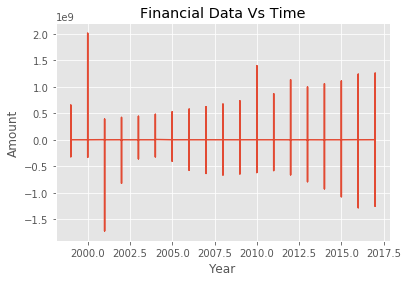

In [32]:
plt.title('Financial Data Vs Time')
plt.xlabel('Year')
plt.ylabel('Amount')
plt.plot(df_2['Fiscal Year'], df_2['Amount'])

In [33]:
(df_2['Amount'] < 0).value_counts()

False    490952
True      28097
Name: Amount, dtype: int64

There are negative values for Amount, could mean that we are earning money when it is negative but probably just an error when inputting the data

In [34]:
df_2.columns

Index(['Fiscal Year', 'Revenue or Spending', 'Related Govt Units',
       'Organization Group', 'Department', 'Program', 'Character', 'Object',
       'Sub-object', 'Fund', 'Fund Category', 'Amount'],
      dtype='object')

In [35]:
# negatives = df_2[ df_2['Amount'] < 0 ].index

In [36]:
# df_2.drop(negatives, inplace=True)

In [37]:
(df_2['Amount'] < 0).value_counts()

False    490952
True      28097
Name: Amount, dtype: int64

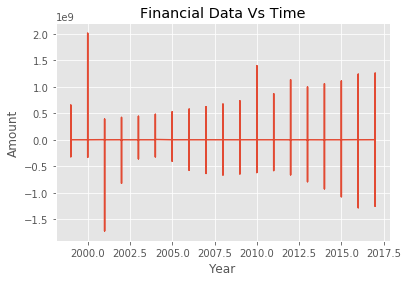

In [38]:
plt.title('Financial Data Vs Time')
plt.xlabel('Year')
plt.ylabel('Amount')
plt.plot(df_2['Fiscal Year'], df_2['Amount'])

In [39]:
df2_spending = df_2[df_2['Revenue or Spending'] == 'Spending']

In [40]:
df2_revenue = df_2[df_2['Revenue or Spending'] == 'Revenue']

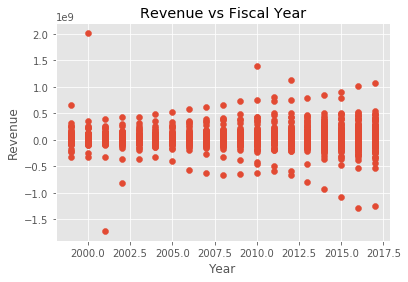

In [41]:
plt.title('Revenue vs Fiscal Year')
plt.xlabel('Year')
plt.ylabel('Revenue')
plt.scatter(df2_revenue['Fiscal Year'], df2_revenue['Amount'])
plt.show()

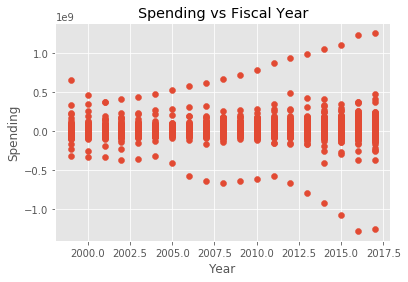

In [42]:
plt.title('Spending vs Fiscal Year')
plt.xlabel('Year')
plt.ylabel('Spending')
plt.scatter(df2_spending['Fiscal Year'], df2_spending['Amount'])
plt.show()

In [43]:
Years=df_2['Fiscal Year'].unique()
Years

array([1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009,
       2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017], dtype=int64)

In [44]:
df_3=df_2.copy()

In [45]:
df_2.groupby(['Fiscal Year']).mean()

,Amount
Fiscal Year,
1999,481338.860386
2000,558261.065169
2001,460647.576950
2002,462178.141644
2003,508617.156193
2004,525858.518384
2005,533244.083233
2006,560321.748261
2007,588420.990165


In [46]:
df2_rev_num = df2_revenue[['Fiscal Year', 'Amount']]
df2_spd_num = df2_spending[['Fiscal Year', 'Amount']]

In [47]:
mean_revenue = df2_rev_num.groupby(['Fiscal Year']).mean()
median_revenue = df2_rev_num.groupby(['Fiscal Year']).median()
max_revenue = df2_rev_num.groupby(['Fiscal Year']).max()
min_revenue = df2_rev_num.groupby(['Fiscal Year']).min()

In [48]:
mean_spending = df2_spd_num.groupby(['Fiscal Year']).mean()
median_spending = df2_spd_num.groupby(['Fiscal Year']).median()
max_spending = df2_spd_num.groupby(['Fiscal Year']).max()
min_spending = df2_spd_num.groupby(['Fiscal Year']).min()

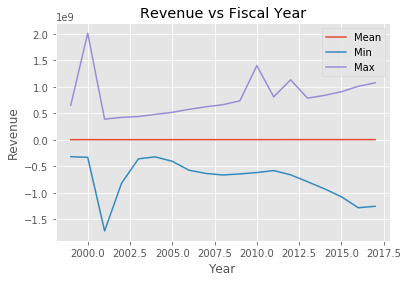

In [56]:
plt.title('Revenue vs Fiscal Year')
plt.xlabel('Year')
plt.ylabel('Revenue')

plt.plot(Years, mean_revenue, label='Mean')
# plt.plot(Years, median_revenue, label='Median')
plt.plot(Years, min_revenue, label='Min')
plt.plot(Years, max_revenue, label='Max')

plt.legend()
plt.show()

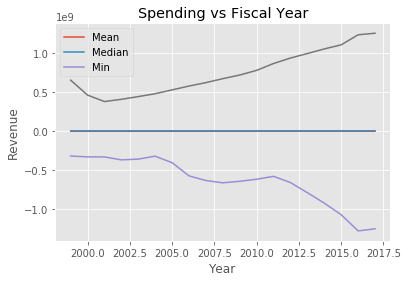

In [57]:
plt.title('Spending vs Fiscal Year')
plt.xlabel('Year')
plt.ylabel('Revenue')

plt.plot(Years, mean_spending, label='Mean')
plt.plot(Years, median_spending, label='Median')
plt.plot(Years, min_spending, label='Min')
plt.plot(Years, max_spending)

plt.legend()
plt.show()

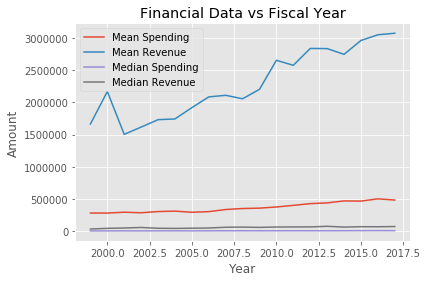

In [51]:
plt.title('Financial Data vs Fiscal Year')
plt.xlabel('Year')
plt.ylabel('Amount')

plt.plot(Years, mean_spending, label='Mean Spending')
plt.plot(Years, mean_revenue, label='Mean Revenue')

plt.plot(Years, median_spending, label='Median Spending')
plt.plot(Years, median_revenue, label='Median Revenue')

plt.legend()
plt.show()

Try doing the same thing with the years but instead grouping by department, objects or sub-objects. This can be done with histograms

In [52]:
df_2.to_csv('SF_data/Spending_Revenue_cleaned.csv')